In [118]:
from tqdm import tqdm_notebook as tqdm # Module for tracking progress. conda install -c conda-forge tqdm
import json
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import json
from afinn import Afinn
import seaborn as sns

df = pd.read_csv (r'C:\Users\Saxen\Documents\Polit\Social Data Science\Slides\Trustpilot\Trustpilot_data.csv')
df.head()

,Unnamed: 0,website,name,review,rating
0,0,SAXO.COM,Rasmus,Uproblematisk og hurtig levering.,5 stjerner: Fremragende
1,1,SAXO.COM,Dan Jensen,God service...,5 stjerner: Fremragende
2,2,SAXO.COM,Rikke,Super fint. Hurtig levering,5 stjerner: Fremragende
3,3,SAXO.COM,jens haase,spændende plot,5 stjerner: Fremragende
4,4,SAXO.COM,Winnie Ankerdal,Hurtig sikker betjening,5 stjerner: Fremragende


In [91]:
df['rating_n'] = df['rating'].str.extract('(\d+)')

In [92]:
df_cc = pd.DataFrame(df.name.str.split(' ',1).tolist(), columns = ['first_name','surname'])

df['first_name'] = df_cc['first_name']
df['surname'] = df_cc['surname']
df.head()
column_names =['website', 'first_name', 'surname', 'name', 'review', 'rating', 'rating_n']
df=df[column_names]
df.head()

,website,first_name,surname,name,review,rating,rating_n
0,SAXO.COM,Rasmus,None,Rasmus,Uproblematisk og hurtig levering.,5 stjerner: Fremragende,5
1,SAXO.COM,Dan,Jensen,Dan Jensen,God service...,5 stjerner: Fremragende,5
2,SAXO.COM,Rikke,None,Rikke,Super fint. Hurtig levering,5 stjerner: Fremragende,5
3,SAXO.COM,jens,haase,jens haase,spændende plot,5 stjerner: Fremragende,5
4,SAXO.COM,Winnie,Ankerdal,Winnie Ankerdal,Hurtig sikker betjening,5 stjerner: Fremragende,5


In [93]:
df['first_name'] = df['first_name'].str.lower()

In [94]:
df_names = pd.read_excel (r'/Users/Saxen/Documents/Polit/Social Data Science/Slides/Trustpilot/Navne.xlsx')
# d for dreng, p for pige og u for unisex


In [95]:
df_names['first_name'] = df_names['first_name'].str.lower()

In [96]:
df_names2 = pd.merge(df, df_names, on='first_name', how='left')

In [97]:
#FInds the number og male and female names
print('Males: ' + str(sum(df_names2.Gender == 'd')),'\n', 'Females: ' + str(sum(df_names2.Gender == 'p')))

Males: 4562 
 Females: 5052


In [98]:
df_names2.count()



website       11259
first_name    11259
surname        7929
name          11259
review        11259
rating        11259
rating_n      11259
Gender        10243
dtype: int64

In [99]:
df_names2.head()
del df_names2['rating']
del df_names2['name']
df_names2['review'] = df_names2['review'].str.lower()

In [100]:
df_names2['review'] = df_names2['review'].str.lower()

In [101]:
df_names2.head()

,website,first_name,surname,review,rating_n,Gender
0,SAXO.COM,rasmus,None,uproblematisk og hurtig levering.,5,d
1,SAXO.COM,dan,Jensen,god service...,5,d
2,SAXO.COM,dan,Jensen,god service...,5,p
3,SAXO.COM,dan,Jensen,god service...,5,u
4,SAXO.COM,rikke,None,super fint. hurtig levering,5,p


In [177]:
afinn = Afinn(language='da',emoticons=True)

 
df_Afinn = df_names2
df_Afinn['Afinn'] = df_Afinn.review.apply(afinn.score)

df_Afinn.head(10)



,website,first_name,surname,review,rating_n,Gender,Afinn,Afinn-test,word count,relativ,relativ_afinn,upper_words
0,SAXO.COM,rasmus,None,uproblematisk og hurtig levering.,5,d,2.0,1,4,50.000000,50.000000,0
1,SAXO.COM,dan,Jensen,god service...,5,d,3.0,1,2,150.000000,150.000000,0
2,SAXO.COM,dan,Jensen,god service...,5,p,3.0,1,2,150.000000,150.000000,0
3,SAXO.COM,dan,Jensen,god service...,5,u,3.0,1,2,150.000000,150.000000,0
4,SAXO.COM,rikke,None,super fint. hurtig levering,5,p,7.0,1,4,175.000000,175.000000,0
5,SAXO.COM,jens,haase,spændende plot,5,d,3.0,1,2,150.000000,150.000000,0
6,SAXO.COM,winnie,Ankerdal,hurtig sikker betjening,5,p,4.0,1,3,133.333333,133.333333,0
7,SAXO.COM,katla,Reehaug,"er rigtig glad for saxo, køber alle mine studi...",4,p,5.0,1,60,3.333333,3.333333,0
8,SAXO.COM,tobias,Jensen,"halvanden dag, og stadigvæk intet fra deres ku...",1,d,1.0,1,39,2.564103,2.564103,0
9,SAXO.COM,ole,Christensen,leveringen fungerede super godt.hurtig afsende...,5,d,19.0,1,21,76.190476,76.190476,0


In [178]:
def word_count(text_string):
    return len(text_string.split())

In [179]:
df_Afinn['word count'] = df_Afinn['review'].apply(word_count)
df_Afinn['relativ_afinn'] = df_Afinn['Afinn'] / df_Afinn['word count']*100
df_Afinn

,website,first_name,surname,review,rating_n,Gender,Afinn,Afinn-test,word count,relativ,relativ_afinn,upper_words
0,SAXO.COM,rasmus,None,uproblematisk og hurtig levering.,5,d,2.0,1,4,50.000000,50.000000,0
1,SAXO.COM,dan,Jensen,god service...,5,d,3.0,1,2,150.000000,150.000000,0
2,SAXO.COM,dan,Jensen,god service...,5,p,3.0,1,2,150.000000,150.000000,0
3,SAXO.COM,dan,Jensen,god service...,5,u,3.0,1,2,150.000000,150.000000,0
4,SAXO.COM,rikke,None,super fint. hurtig levering,5,p,7.0,1,4,175.000000,175.000000,0
5,SAXO.COM,jens,haase,spændende plot,5,d,3.0,1,2,150.000000,150.000000,0
6,SAXO.COM,winnie,Ankerdal,hurtig sikker betjening,5,p,4.0,1,3,133.333333,133.333333,0
7,SAXO.COM,katla,Reehaug,"er rigtig glad for saxo, køber alle mine studi...",4,p,5.0,1,60,3.333333,8.333333,0
8,SAXO.COM,tobias,Jensen,"halvanden dag, og stadigvæk intet fra deres ku...",1,d,1.0,1,39,2.564103,2.564103,0
9,SAXO.COM,ole,Christensen,leveringen fungerede super godt.hurtig afsende...,5,d,19.0,1,21,76.190476,90.476190,0


C:\Users\Saxen\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Saxen\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\Saxen\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered i

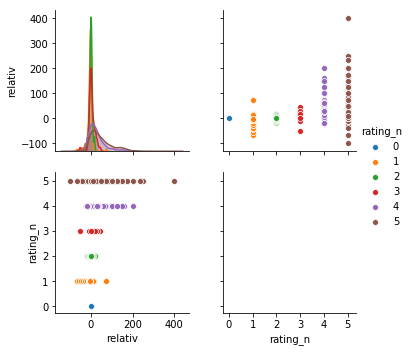

In [173]:
# define columns
sentiment_columns = ['relativ']
hue = 'rating_n'
sns.pairplot(df_Afinn.sample(1000)[['relativ']+[hue]], hue=hue)

#sns.set(color_codes=True)
#g = sns.pairplot()
#sns.set(color_codes=True)
#g= sns.pairplot(iris, hue="species",  palette="husl",diag_kws=dict(shade=False) )

In [174]:
df_Afinn.sample(10)

,website,first_name,surname,review,rating_n,Gender,Afinn,Afinn-test,word count,relativ,relativ_afinn
823,SAXO.COM,katla,Reehaug,"er rigtig glad for saxo, køber alle mine studi...",4,p,2.0,1,60,3.333333,3.333333
3524,WWW.BILKA.DK,christina,Maria Juhl,jeres butik er vældig fin. men jeres kundeserv...,1,p,0.0,1,159,0.000000,0.000000
10759,WWW.JUST-EAT.DK,deniz,None,burde ændre just eat til fat and the furious s...,5,u,0.0,1,40,0.000000,0.000000
9397,SWEETDEAL.DK,inge,None,"super hyggeligt sted, varm atmosfære og dejlig...",5,p,4.0,1,14,28.571429,28.571429
1505,WWW.ELGIGANTEN.DK,cenneth,Møller,altid en fornøjelse at handle med elgiganten,5,NaN,3.0,1,7,42.857143,42.857143
5247,SHOPPING.COOP.DK,hjalte,Laursen,"sen levering, del af ordren fejlleveret og fej...",2,d,-5.0,1,42,-11.904762,-11.904762
1823,WWW.ELGIGANTEN.DK,alexander,Schulz,dett er rigtig dårlig stil at skrive det tager...,2,d,-3.0,1,22,-13.636364,-13.636364
4299,WWW.BILKA.DK,marianne,Arndt Sørensen,bestilling gik hurtigt om nemt. fantastisk.,5,p,6.0,1,6,100.000000,100.000000
5767,WWW.DSB.DK,dorthe,Krøigaard,"nu har jeg i rigtig mange år taget toget, både...",1,p,-5.0,1,203,-2.463054,-2.463054
5440,SHOPPING.COOP.DK,lena,nielsen,"har købt en fuglefoder automat,og den er allet...",5,p,0.0,1,8,0.000000,0.000000


In [175]:
test = pd.read_csv (r'C:\Users\Saxen\Documents\Polit\Social Data Science\Slides\afin-0.1.tar.gz')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Saxen\\Documents\\Polit\\Social Data Science\\Slides\\afin-0.1.tar.gz'

In [176]:
def uppercase(text_string):
    upper_w = 0
    for word in text_string.split():
        upper_w += word.isupper()
    return upper_w

df_Afinn['upper_words'] = df_Afinn['review'].apply(uppercase)

In [181]:
import re
def exclamation_n(text_string):
    exclamation = 0
    for rev in text_string:
        exclamation = len(re.findall('!', text_string))
    return exclamation

In [190]:
int(df_Afinn['rating_n'])

TypeError: cannot convert the series to <class 'int'>

In [186]:
df_Afinn['exclamation_points'] = 0 
df_Afinn['exclamation_points'] = df_Afinn[df_Afinn['rating_n']<3]['review'].apply(exclamation_n)

ValueError: invalid literal for int() with base 10: 'rating_n'

In [204]:
#df_Afinn['rating_n']=[int(i) for i in df_Afinn['rating_n']]
df_Afinn['rating_n'] = df_Afinn['rating_n'].astype(int)

In [202]:
df_Afinn['exclamation_points'] = 0 
df_Afinn['exclamation_points'] = df_Afinn['rating_n']<3['review'].apply(exclamation_n)

TypeError: 'int' object is not subscriptable

In [211]:
mask = df_Afinn['rating_n'] < 3 

In [212]:
df_Afinn.loc[mask, 'review'] = df_Afinn.loc[mask, 'review'].apply(exclamation_n)

In [220]:
df_Afinn.head(200)

,website,first_name,surname,review,rating_n,Gender,Afinn,Afinn-test,word count,relativ,relativ_afinn,upper_words,exclamation_points
0,SAXO.COM,rasmus,None,uproblematisk og hurtig levering.,5,d,2.0,1,4,50.000000,50.000000,0,0
1,SAXO.COM,dan,Jensen,god service...,5,d,3.0,1,2,150.000000,150.000000,0,0
2,SAXO.COM,dan,Jensen,god service...,5,p,3.0,1,2,150.000000,150.000000,0,0
3,SAXO.COM,dan,Jensen,god service...,5,u,3.0,1,2,150.000000,150.000000,0,0
4,SAXO.COM,rikke,None,super fint. hurtig levering,5,p,7.0,1,4,175.000000,175.000000,0,0
5,SAXO.COM,jens,haase,spændende plot,5,d,3.0,1,2,150.000000,150.000000,0,0
6,SAXO.COM,winnie,Ankerdal,hurtig sikker betjening,5,p,4.0,1,3,133.333333,133.333333,0,0
7,SAXO.COM,katla,Reehaug,"er rigtig glad for saxo, køber alle mine studi...",4,p,5.0,1,60,3.333333,8.333333,0,0
8,SAXO.COM,tobias,Jensen,1,1,d,1.0,1,39,2.564103,2.564103,0,0
9,SAXO.COM,ole,Christensen,leveringen fungerede super godt.hurtig afsende...,5,d,19.0,1,21,76.190476,90.476190,0,0
